In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [2]:
# Load dữ liệu Iris
iris = load_iris()
iris_df = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                      columns=iris['feature_names'] + ['target']) # Convert to pandas DataFrame for using head()
display(iris_df.head())
X = iris.data[:, 2:]  # Chỉ dùng petal length và petal width
y = iris.target

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


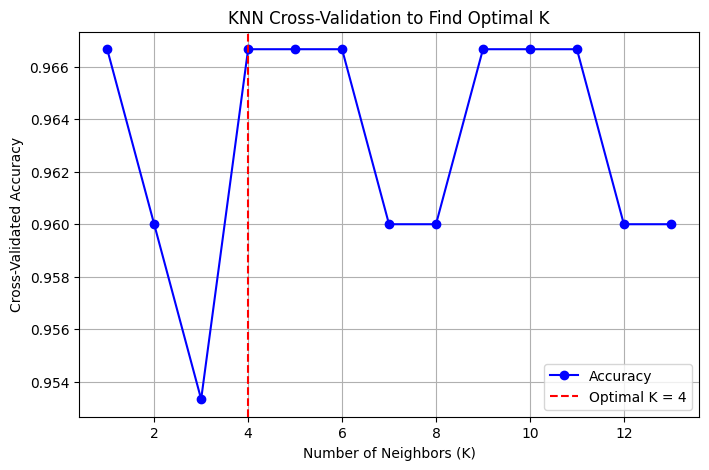

Optimal K: 4


[0.9666666666666666,
 0.96,
 0.9533333333333334,
 0.9666666666666668,
 0.9666666666666668,
 0.9666666666666668,
 0.96,
 0.96,
 0.9666666666666668,
 0.9666666666666668,
 0.9666666666666668,
 0.96,
 0.96]

In [ ]:
# Tìm giá trị K tối ưu bằng cross-validation
k_values = range(1, 14)
cv_scores = [cross_val_score(KNeighborsClassifier(n_neighbors=k), X, y, cv=5).mean() for k in k_values]
best_k = k_values[np.argmax(cv_scores)]

# Vẽ biểu đồ Accuracy theo K
plt.figure(figsize=(8, 5))
plt.plot(k_values, cv_scores, marker='o', linestyle='-', color='b', label="Accuracy")
plt.axvline(best_k, linestyle='--', color='r', label=f'Optimal K = {best_k}')
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Cross-Validated Accuracy")
plt.title("KNN Cross-Validation to Find Optimal K")
plt.legend()
plt.grid(True)
plt.show()
print(f"Optimal K: {best_k}")


In [4]:
# Huấn luyện mô hình với K tối ưu
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X, y)

# Random một điểm mới trong khoảng giá trị của X
random_point = np.random.uniform(X.min(axis=0), X.max(axis=0)).reshape(1, -1)
predicted_label = knn.predict(random_point)

# Dự đoán trên toàn bộ dữ liệu để tính accuracy
accuracy = knn.score(X, y)

# Hiển thị kết quả
print(f"Random Point: {random_point.flatten()}")
print(f"Predicted Label: {iris.target_names[predicted_label][0]}")
print(f"Model Accuracy: {accuracy:.4f}")

Random Point: [1.10946855 0.95751337]
Predicted Label: setosa
Model Accuracy: 0.9733


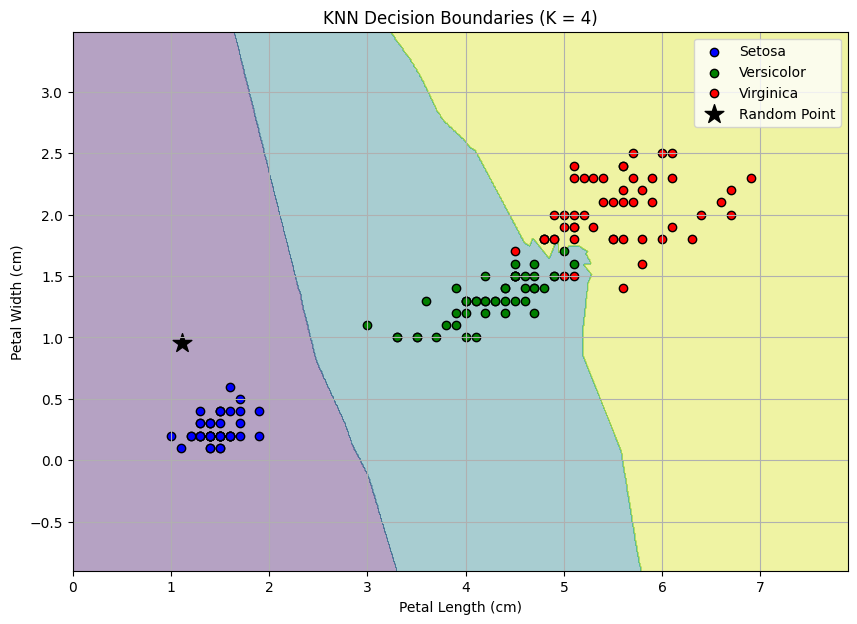

In [5]:
# Vẽ quyết định biên giới
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(10, 7))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')

# Vẽ dữ liệu gốc
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='blue', label='Setosa', edgecolor='k')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='green', label='Versicolor', edgecolor='k')
plt.scatter(X[y == 2, 0], X[y == 2, 1], c='red', label='Virginica', edgecolor='k')

# Vẽ điểm mới
plt.scatter(random_point[:, 0], random_point[:, 1], c='black', marker='*', s=200, label='Random Point')

plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title(f"KNN Decision Boundaries (K = {best_k})")
plt.legend()
plt.grid(True)
plt.show()